In [ ]:
!pip install netCDF4
!pip install cartopy

In [ ]:
import netCDF4
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
url='http://182.16.248.173:8080/dods/INA-NWP/2023/2023051212/2023051212-d02-asim'
dataset=netCDF4.Dataset(url)

In [ ]:
# Extract the wind shear variable
Uz = dataset.variables['afwa_llws']

# Select a specific height
height = 500

# Select a specific time step (e.g., the first time step)
time_step = 8

# Select a specific level (e.g., the first level)
level = 0

# Extract the wind shear for the selected time step and level
Uz_time_level = Uz[time_step, level, :, :]

print(Uz_time_level)

[[3.4469254  3.4348872  3.4308727  ... 2.161877   2.1846802  2.1996145 ]
 [3.5343125  3.4926224  3.46693    ... 2.1879852  2.2277682  2.229146  ]
 [3.5425162  3.5038683  3.4586103  ... 2.1990376  2.2252378  2.2389066 ]
 ...
 [2.0945835  1.8554182  1.4930074  ... 0.83057076 0.8880263  0.9079402 ]
 [1.2931958  1.2554559  1.2181624  ... 0.8248445  0.8623046  0.8779161 ]
 [0.9980857  1.0219847  1.2399082  ... 0.86646587 0.88573796 0.8758918 ]]


In [ ]:
latmin = -6
latmax = -8
lonmin = 106
lonmax = 112
bounds = [lonmin, lonmax, latmin, latmax]

print(bounds)

[106, 112, -6, -8]


In [ ]:
lat = dataset.variables['xlat'][:][0, 0, :, :]
lon = dataset.variables['xlong'][:][0, 0, :, :]
print(lat.shape, lon.shape)

(297, 606) (297, 606)


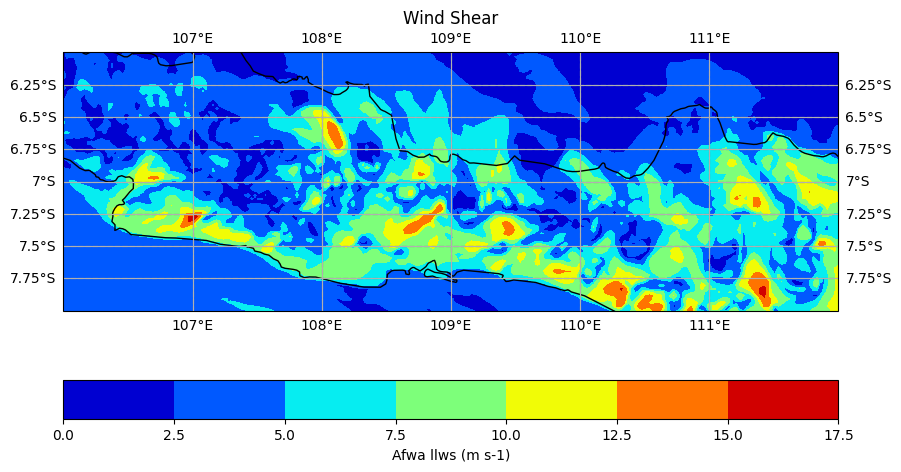

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())

#plot filled countours
contourf = ax.contourf(lon, lat, Uz_time_level, transform=ccrs.PlateCarree(), cmap='jet')

#add gridlines with labels
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
g1.xlabels_top = False
g1.ylabels_right = False
g1.xlabels_style = {'size':12, 'color': 'black'}
g1.ylabels_right = {'size':12, 'color': 'black'}

#add coastlines
ax.coastlines()

#add gridlines
ax.gridlines()

#add color bar
plt.colorbar(contourf, orientation = 'horizontal', label = 'Afwa llws (m s-1)')

plt.title('Wind Shear')
plt.xlabel('xlat')
plt.ylabel('xlon')

plt.show()

In [ ]:
# Extract the wind shear variable
wdir = dataset.variables['wdir']

# Select a specific height
height = 500

# Select a specific time step (e.g., the first time step)
time_step = 8

# Select a specific level (e.g., the first level)
level = 1

# Extract the wind shear for the selected time step and level
wdir_time_level = wdir[time_step, level, :, :]

print(wdir_time_level)

[[100.56439  100.60184  100.66475  ... 123.609436 123.58292  123.63951 ]
 [100.83424  100.86847  100.975075 ... 123.77008  123.78818  123.86975 ]
 [101.25922  101.33219  101.50996  ... 123.9242   123.9868   124.08105 ]
 ...
 [137.77966  139.81056  141.26486  ... 157.3966   157.72566  158.01392 ]
 [138.26822  139.40497  136.62209  ... 156.83417  157.36742  157.88582 ]
 [138.77716  138.97691  135.9393   ... 156.27773  157.13324  157.89694 ]]


In [ ]:
# Select a specific height
height = 500

# Select a specific time step (e.g., the first time step)
time_step = 8

# Select a specific level (e.g., the first level)
level = 2

# Extract the wind shear for the selected time step and level
wdir1_time_level = wdir[time_step, level, :, :]

print(wdir1_time_level)

[[100.3996   100.31679  100.334656 ... 123.08897  123.190155 123.24273 ]
 [100.40705  100.284996 100.25034  ... 123.396736 123.382866 123.34674 ]
 [100.33627  100.207596 100.09772  ... 123.449356 123.4738   123.45944 ]
 ...
 [125.0453   129.67842  129.45988  ... 120.00243  120.29564  120.29675 ]
 [122.74858  126.17294  126.72872  ... 119.45996  119.563705 119.56807 ]
 [120.14858  122.15439  125.262955 ... 119.11979  119.01139  118.96875 ]]


In [ ]:
directional_shear = wdir1_time_level - wdir_time_level

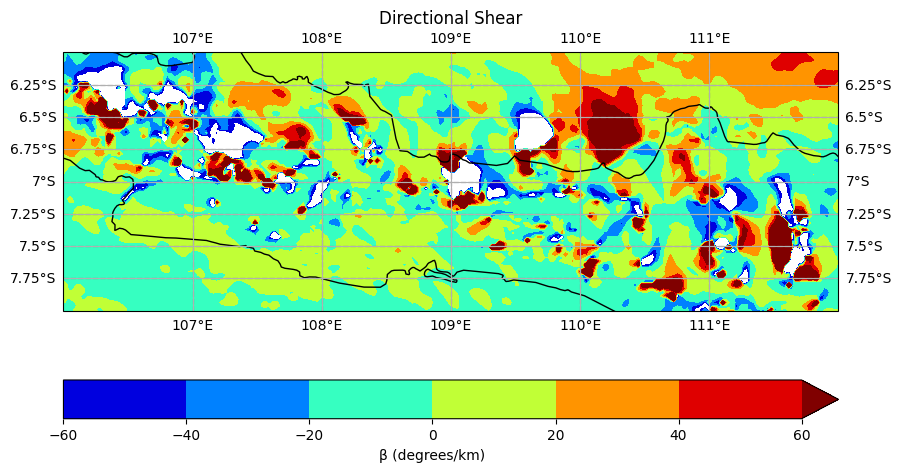

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())

#plot filled countours
contourf = ax.contourf(lon, lat, directional_shear, levels = [-60, -40, -20, 0, 20, 40, 60], transform=ccrs.PlateCarree(), extend='max', cmap='jet')

#add gridlines with labels
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
g1.xlabels_top = False
g1.ylabels_right = False
g1.xlabels_style = {'size':12, 'color': 'black'}
g1.ylabels_right = {'size':12, 'color': 'black'}

#add coastlines
ax.coastlines()

#add gridlines
ax.gridlines()

#add color bar
plt.colorbar(contourf, orientation = 'horizontal', label = 'β (degrees/km)')

plt.title('Directional Shear')
plt.xlabel('xlat')
plt.ylabel('xlon')

plt.show()

In [ ]:
# Extract the wind shear variable
wspd = dataset.variables['wspd']

# Select a specific height
height = 500

# Select a specific time step (e.g., the first time step)
time_step = 8

# Select a specific level (e.g., the first level)
level = 1

# Extract the wind shear for the selected time step and level
wspdz_time_level = wspd[time_step, level, :, :]

In [ ]:
# Select a specific height
height = 500

# Select a specific time step (e.g., the first time step)
time_step = 8

# Select a specific level (e.g., the first level)
level = 2

# Extract the wind shear for the selected time step and level
wspdzr_time_level = wspd[time_step, level, :, :]

In [ ]:
Uz = (wspdzr_time_level / wspdz_time_level) * 0.04

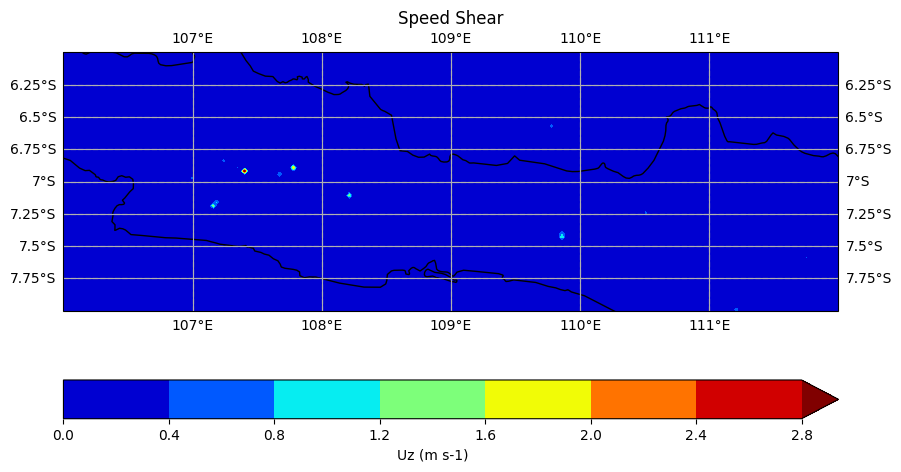

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())

#plot filled countours
contourf = ax.contourf(lon, lat, Uz, transform=ccrs.PlateCarree(), extend='max', cmap='jet')

#add gridlines with labels
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
g1.xlabels_top = False
g1.ylabels_right = False
g1.xlabels_style = {'size':12, 'color': 'black'}
g1.ylabels_right = {'size':12, 'color': 'black'}

#add coastlines
ax.coastlines()

#add gridlines
ax.gridlines()

#add color bar
plt.colorbar(contourf, orientation = 'horizontal', label = 'Uz (m s-1)')

plt.title('Speed Shear')
plt.xlabel('xlat')
plt.ylabel('xlon')

plt.show()

In [ ]:
# Extract the wind shear variable
height = dataset.variables['height']

# Select a specific time step (e.g., the first time step)
time_step = 8

# Select a specific level (e.g., the first level)
level = 3

# Extract the wind shear for the selected time step and level
height_time_level = height[time_step, level, :, :]

print(height_time_level)

[[1.5385619 1.5385325 1.5386275 ... 1.5362716 1.5362408 1.5362334]
 [1.5382023 1.5383244 1.5385369 ... 1.5363374 1.5365332 1.5371119]
 [1.5377963 1.5380907 1.5382805 ... 1.5361931 1.5362933 1.5366067]
 ...
 [1.497947  1.4980457 1.4981673 ... 1.5186293 1.518486  1.51785  ]
 [1.4980339 1.4979321 1.4979725 ... 1.5185474 1.518402  1.5180372]
 [1.4979413 1.4978535 1.4977329 ... 1.5182784 1.5182989 1.5183526]]


In [ ]:
max_height = np.max(height_time_level)

print("Maximum value of height:", max_height)

min_height = np.min(height_time_level)

print("Minimum value of height:", min_height)

Maximum value of height: 1.550222
Minimum value of height: 1.4822376


In [ ]:
# Extract the wind shear variable
qice = dataset.variables['qice']

# Select a specific height
height = 500

# Select a specific time step (e.g., the first time step)
time_step = 8

# Select a specific level (e.g., the first level)
level = 2

# Extract the wind shear for the selected time step and level
qice_time_level = qice[time_step, level, :, :]

print(qice_time_level)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
max_qice = np.max(qice_time_level)

print("Maximum value of qice:", max_qice)

min_qice = np.min(qice_time_level)

print("Minimum value of qice:", min_qice)

Maximum value of qice: 0.0
Minimum value of qice: 0.0


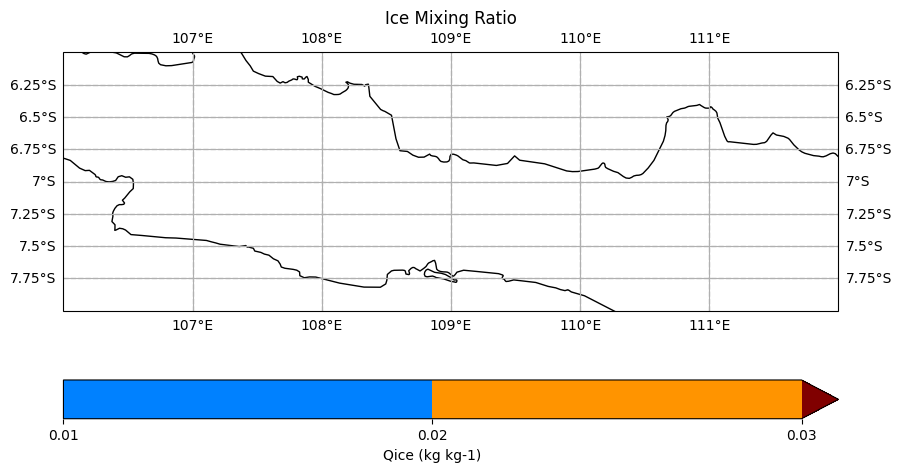

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())

#plot filled countours
contourf = ax.contourf(lon, lat, qice_time_level, levels = [0.01, 0.02, 0.03], transform=ccrs.PlateCarree(), cmap='jet')

#add gridlines with labels
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
g1.xlabels_top = False
g1.ylabels_right = False
g1.xlabels_style = {'size':12, 'color': 'black'}
g1.ylabels_right = {'size':12, 'color': 'black'}

#add coastlines
ax.coastlines()

#add gridlines
ax.gridlines()

#add color bar
plt.colorbar(contourf, orientation = 'horizontal', label = 'Qice (kg kg-1)')

plt.title('Ice Mixing Ratio')
plt.xlabel('xlat')
plt.ylabel('xlon')

plt.show()